In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #-- to ignore warnings

In [2]:
#Loading dataset
df=pd.read_csv("C:/Users/Ashraf/Downloads/Assignment/delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.shape

(21, 2)

Inference: We have 21 rows and two columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Inference: No NA value

In [7]:
# summary
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df2=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df2.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


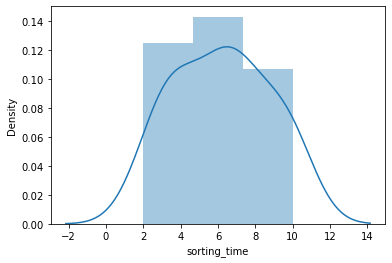

In [9]:
sns.distplot(df2['sorting_time'])
plt.show()

Inference: Dataset are normally distributed

In [10]:
df2.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Fitting a linear regression model

In [11]:
import statsmodels.formula.api as smf

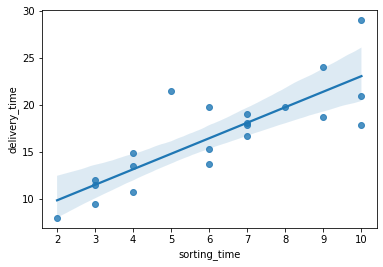

In [12]:
sns.regplot(x='sorting_time',y='delivery_time',data=df2)
plt.show()

In [13]:
model=smf.ols("delivery_time~sorting_time",data=df2).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
# t_value and p_value
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [16]:
# rsquared and rsquared_adj values
(model.rsquared, model.rsquared_adj )

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [17]:
newdata=pd.Series([4,6,9])

In [18]:
newdata

0    4
1    6
2    9
dtype: int64

In [19]:
data_pred=pd.DataFrame(newdata, columns=['sorting_time'])

In [20]:
data_pred

,sorting_time
0,4
1,6
2,9


In [21]:
model.predict(data_pred)

0    13.178814
1    16.476853
2    21.423913
dtype: float64